In [ ]:
# Compare detections of marine mammal vocalizations to  Sea Surface Temperature.
# Specifically, look at the ADEON EN615 deployment off Cape Hatteras, from 
# November 2017 to June 2018. For SST, get a csv file of SST from NASA JPL's 
# GHRSST Level 4 MUR Global Foundation Sea Surface Temperature Analysis.
# For marine mammal vocalizations, get a csv file of whistle detections from 
# analyzing (elsewhere) ADEON's EN615 HAT high-frequency hydrophone data.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [3]:
# Downloaded csv of SST using url:
# https://coastwatch.pfeg.noaa.gov/erddap/griddap/jplMURSST41.csv?analysed_sst[(2017-11-01T00:00:00Z):1:(2018-07-01T00:00:00Z)][(35):1:(35.5)][(-75.25):1:(-74.75)],analysis_error[(2017-11-01T00:00:00Z):1:(2018-07-01T00:00:00Z)][(35):1:(35.5)][(-75.25):1:(-74.75)]
    

In [4]:
# Load SST csv file into pandas dataframe
df_sst = pd.read_csv('jplMURSST41_6956_80b0_6cc6.csv', header=1)
df_sst.head()

,UTC,degrees_north,degrees_east,degree_C,degree_C.1
0,2017-11-01T09:00:00Z,35.0,-75.25,25.399,0.38
1,2017-11-01T09:00:00Z,35.0,-75.24,25.346,0.38
2,2017-11-01T09:00:00Z,35.0,-75.23,25.305,0.38
3,2017-11-01T09:00:00Z,35.0,-75.22,25.276,0.38
4,2017-11-01T09:00:00Z,35.0,-75.21,25.258,0.38


In [7]:
# Convert to datetime like
# df['Time stamp'] = pd.to_datetime(df['Time stamp'], format= '%d/%m/%Y')
df_sst['ts_UTC'] = pd.to_datetime(df_sst['UTC'], format='%Y-%m-%dT%H:%M:%SZ')


In [37]:
# Get the SST directly over the mooring
df_sst_over_mooring = df_sst.query("degrees_north==35.2 & degrees_east==-75.0")
#df_sst_over_mooring.head()
#df.dtypes

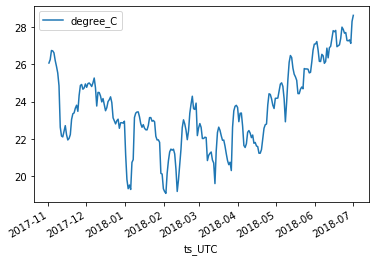

In [38]:
# Plot SST
df_sst_over_mooring.plot(x='ts_UTC',y='degree_C')


In [47]:
# Elsewhere, I analyzed ADEON EN615 deployment at Cape Hatteras to detect 
# whistles, using Silbido. This analysis yielded a csv file with the following features: 
# bottom temperature (at a depth of about 290m) and a measure of the amount of whistling 
# per recording interval
df_whistles = pd.read_csv('whistles_ADEON.csv', header=0)
df_whistles.head()


,time,degrees_C_Bottom,fraction_Whistling
0,2017-11-24T14:18:56Z,NaN,0.00
1,2017-11-24T14:39:56Z,10.27,0.00
2,2017-11-24T15:00:56Z,10.28,0.00
3,2017-11-24T15:21:56Z,10.30,0.00
4,2017-11-24T15:42:56Z,10.33,0.02


In [48]:
# Convert to datetime like
# df['Time stamp'] = pd.to_datetime(df['Time stamp'], format= '%d/%m/%Y')
df_whistles['ts_UTC'] = pd.to_datetime(df_whistles['time'].str.strip(), format='%Y-%m-%dT%H:%M:%SZ')
#df_whistles.head()


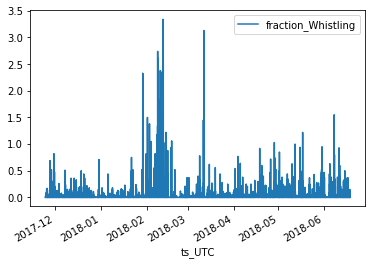

In [49]:
# Plot
df_whistles.plot(x='ts_UTC',y='fraction_Whistling')
#plt.plot(df_whistles['degrees_C_Bottom'].dropna())


Text(0, 0.5, 'SST in degrees C')

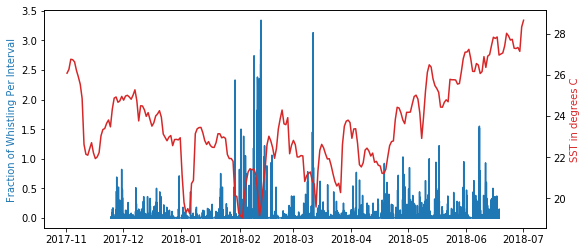

In [50]:
# Is there a relationship between the amount of whistling and the SST? 
# Start by plotting them together
fig, ax1 = plt.subplots(figsize=(9,4))
# Whistles
color1 = 'tab:blue'
ax1.plot(df_whistles['ts_UTC'],df_whistles['fraction_Whistling'], color=color1)
ax1.set_ylabel('Fraction of Whistling Per Interval', color=color1)
# SST
color2 = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(df_sst_over_mooring['ts_UTC'],df_sst_over_mooring['degree_C'], color=color2)
ax2.set_ylabel('SST in degrees C', color=color2)




In [24]:
# There were 4 events (in Winter 2018) where the SST dropped below 20. 
# During 3 of these events, the fraction of whistling was very high.